### Import Libraries

In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats



### Load Data

In [16]:
df = pd.read_csv(r'D:\ActivityP\Activity_Data\ActivityData.csv')
df

,steps,distance,trackerDistance,loggedActivitiesDistance,veryActiveDistance,moderatelyActiveDistance,lightActiveDistance,sedentaryActiveDistance,veryActiveMinutes,fairlyActiveMinutes,lightlyActiveMinutes,sedentaryMinutes,calories
0,11004.0,7.110000,7.110000,3.416596,2.570,0.46,4.07,0.01,33.0,12.000000,205.0,804,1819.0
1,17609.0,11.550000,11.550000,3.416596,6.920,0.73,3.91,0.01,89.0,17.000000,274.0,588,2154.0
2,12736.0,8.530000,8.530000,3.416596,4.660,0.16,3.71,0.01,56.0,5.000000,268.0,605,1944.0
3,13231.0,8.930000,8.930000,3.416596,3.190,0.79,4.95,0.01,39.0,20.000000,224.0,1080,1932.0
4,12041.0,7.850000,7.850000,3.416596,2.160,1.09,4.61,0.01,28.0,28.000000,243.0,763,1886.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,23014.0,20.389999,20.389999,3.416596,11.100,0.63,8.62,0.01,70.0,29.000000,359.0,982,4196.0
413,16470.0,8.070000,8.070000,3.416596,1.515,0.02,8.02,0.01,90.0,9.000000,289.0,1052,3841.0
414,28497.0,27.530001,27.530001,3.416596,21.920,1.12,4.46,0.01,128.0,46.000000,211.0,1055,4526.0
415,10622.0,8.060000,8.060000,3.416596,1.470,0.15,6.37,0.01,18.0,7.000000,225.0,1190,2820.0


### Exploratory Data Analysis
1. Descriptive Analysis 
 
    a) Measure of Central Tendency
    >The dataset contains both very low and very high calorie counts.
    
    >min: The smallest value in the dataset for each feature. For calories, the smallest value is 4, indicating that some records have very low calorie values.

    > 75% of records have fewer than 10467 calories.

In [9]:
df.describe()

,steps,distance,trackerDistance,loggedActivitiesDistance,veryActiveDistance,moderatelyActiveDistance,lightActiveDistance,sedentaryActiveDistance,veryActiveMinutes,fairlyActiveMinutes,lightlyActiveMinutes,sedentaryMinutes,calories
count,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,416.000000
mean,7521.785372,5.384712,5.361295,3.416596,2.038957,0.826619,3.448616,0.011175,30.750600,25.969565,201.875325,952.623501,2251.552885
std,4971.359896,3.802050,3.770250,0.390458,2.297051,0.725643,1.927407,0.006990,24.476542,35.382416,102.117038,321.969017,806.404244
min,4.000000,0.010000,0.010000,0.055843,0.010000,0.020000,0.010000,0.010000,1.000000,1.000000,1.000000,32.000000,50.000000
25%,3436.000000,2.510000,2.540000,3.416596,1.470000,0.610000,2.090000,0.010000,25.000000,15.000000,139.000000,710.000000,1786.000000
50%,6895.500000,4.965000,4.960000,3.416596,1.515000,0.670000,3.448616,0.010000,26.000000,25.969565,201.875325,990.000000,2145.500000
75%,10467.000000,7.380000,7.350000,3.416596,1.590000,0.760000,4.610000,0.010000,27.000000,25.969565,263.000000,1208.000000,2757.750000
max,28497.000000,27.530001,27.530001,6.727057,21.920000,6.400000,12.510000,0.100000,202.000000,660.000000,720.000000,1440.000000,4562.000000


  b) Measure of Variability 
  
  Range, Variance, Standard deviation, IQR
  >Activity Level: Majority of the spends a significant amount of time in sedentary activity but they also engage in moderate-to-high levels of activity (over 2 hours).

  >Caloric Burn: The individual burns a notable amount of calories (4512 kcal), which seems consistent with the activity levels, indicating they are generally active throughout the day.

  >"lightly active" and "fairly active" categories, which might indicate some of them who maintains relatively active habits but also spends a lot of time sitting.

  >Distance balances out the higher levels of activity.

In [11]:
range_value = df.max() - df.min()
range_value

steps                       28493.000000
distance                       27.520001
trackerDistance                27.520001
loggedActivitiesDistance        6.671214
veryActiveDistance             21.910000
moderatelyActiveDistance        6.380000
lightActiveDistance            12.500000
sedentaryActiveDistance         0.090000
veryActiveMinutes             201.000000
fairlyActiveMinutes           659.000000
lightlyActiveMinutes          719.000000
sedentaryMinutes             1408.000000
calories                     4512.000000
dtype: float64

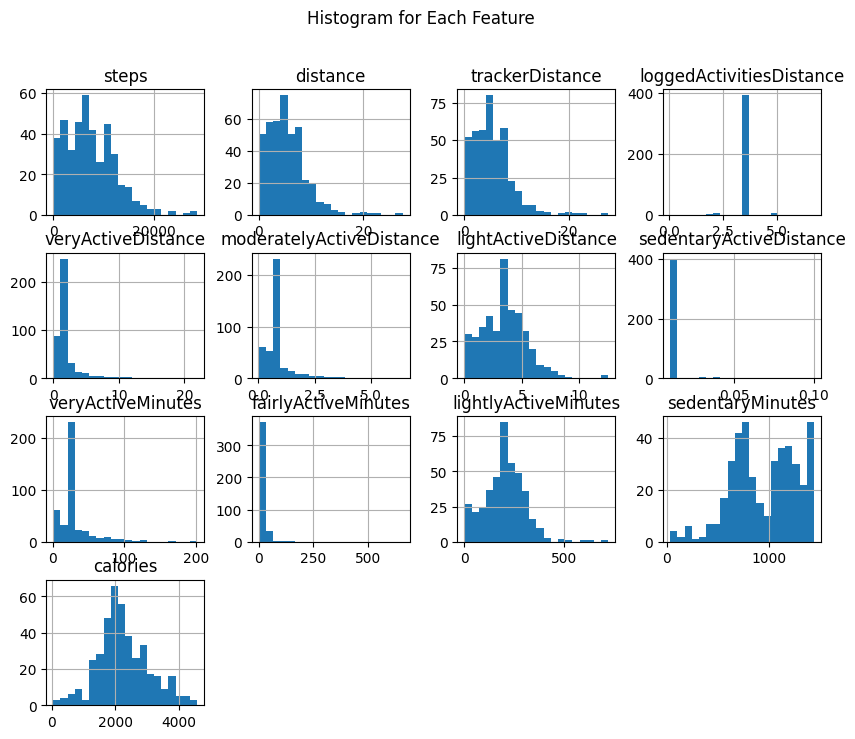

In [20]:
#HIstogram
df.hist(figsize=(10, 8), bins=20)
plt.suptitle('Histogram for Each Feature')
plt.show()

In [13]:
variance = df.var()
variance

steps                       2.471442e+07
distance                    1.445558e+01
trackerDistance             1.421478e+01
loggedActivitiesDistance    1.524577e-01
veryActiveDistance          5.276442e+00
moderatelyActiveDistance    5.265585e-01
lightActiveDistance         3.714898e+00
sedentaryActiveDistance     4.885630e-05
veryActiveMinutes           5.991011e+02
fairlyActiveMinutes         1.251915e+03
lightlyActiveMinutes        1.042789e+04
sedentaryMinutes            1.036640e+05
calories                    6.502878e+05
dtype: float64

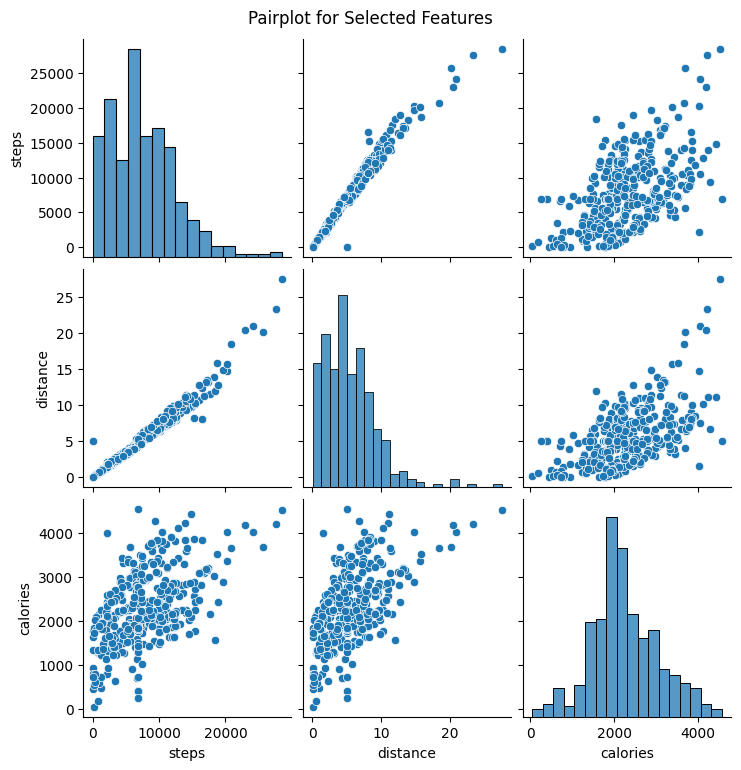

In [21]:
sns.pairplot(df[['steps', 'distance', 'calories']])
plt.suptitle('Pairplot for Selected Features', y=1.02)
plt.show()

In [15]:
std_deviation = df.std()
std_deviation

steps                       4971.359896
distance                       3.802050
trackerDistance                3.770250
loggedActivitiesDistance       0.390458
veryActiveDistance             2.297051
moderatelyActiveDistance       0.725643
lightActiveDistance            1.927407
sedentaryActiveDistance        0.006990
veryActiveMinutes             24.476542
fairlyActiveMinutes           35.382416
lightlyActiveMinutes         102.117038
sedentaryMinutes             321.969017
calories                     806.404244
dtype: float64

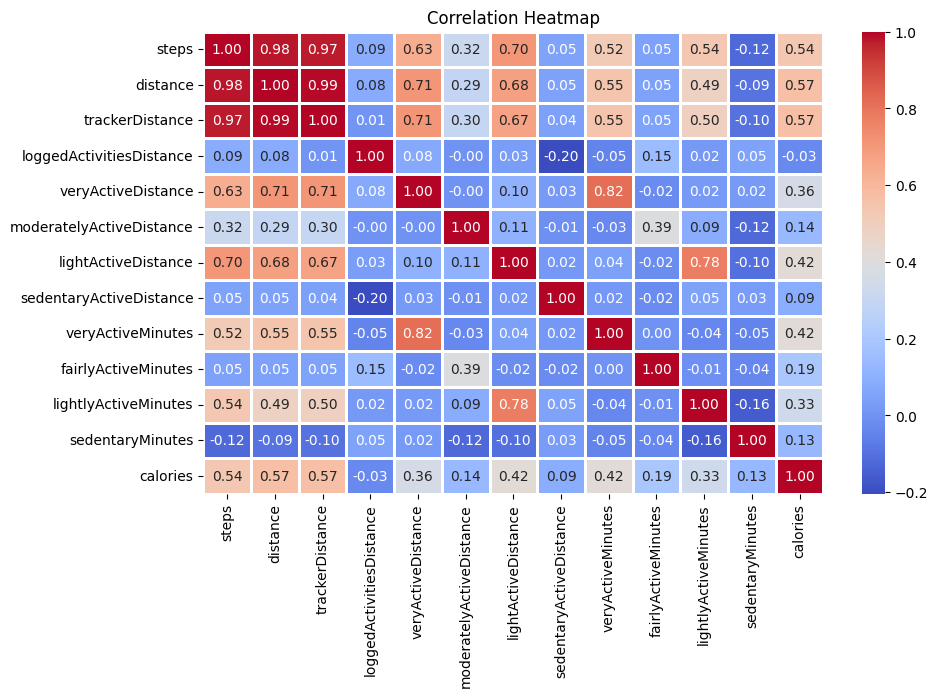

In [22]:
# Correlation matrix
correlation_matrix = df.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1)
plt.title('Correlation Heatmap')
plt.show()

In [17]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
IQR

steps                       7031.000000
distance                       4.870000
trackerDistance                4.810000
loggedActivitiesDistance       0.000000
veryActiveDistance             0.120000
moderatelyActiveDistance       0.150000
lightActiveDistance            2.520000
sedentaryActiveDistance        0.000000
veryActiveMinutes              2.000000
fairlyActiveMinutes           10.969565
lightlyActiveMinutes         124.000000
sedentaryMinutes             498.000000
calories                     971.750000
dtype: float64

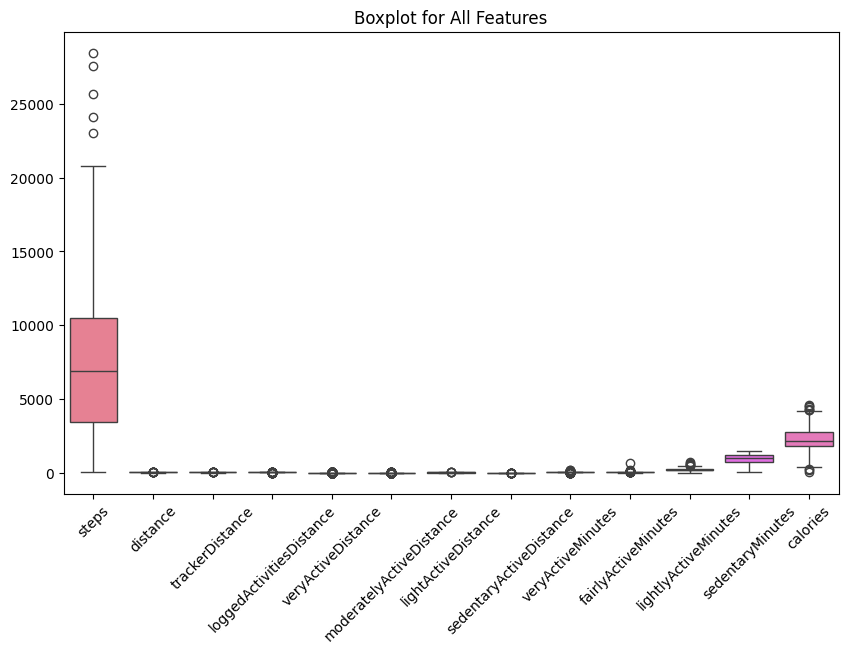

In [25]:
# Boxplot for the entire dataset
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title('Boxplot for All Features')
plt.xticks(rotation=45)
plt.show()

2. Inferential Statistics
    
    a) Hypothesis Testing
    
    T-test
    >Since the p-value is significantly smaller than the standard significance level of 0.05, you can reject the null hypothesis. 
    
    >The null hypothesis might state that there is no difference in the average Distance covered between Period 1 and Period 2.

    >Periods are assumed to be the group of people!

In [34]:
# Example data for two periods/groups
period1_vam = [599, 620, 580, 610, 590]  # VeryActiveMinutes for Period 1
period2_vam = [700, 710, 680, 690, 700]  # VeryActiveMinutes for Period 2

period1_distance = [14.46, 14.50, 14.30, 14.60, 14.40]  # Distance for Period 1
period2_distance = [15.5, 15.6, 15.4, 15.7, 15.5]  # Distance for Period 2

# Perform a paired t-test for each metric
t_stat_vam, p_value_vam = stats.ttest_rel(period1_vam, period2_vam)  # VeryActiveMinutes
t_stat_distance, p_value_distance = stats.ttest_rel(period1_distance, period2_distance)  # Distance

# Output the results
print(f"P-value: {p_value_vam}")
print(f"P-value: {p_value_distance}")

P-value: 4.805592507443835e-05
P-value: 8.871734336283456e-08


b) Confidence Interval

> Fairly certain that the true average distance covered by the population is between 14.31 and 14.59.

>The true average distance in the population lies within this interval.


In [ ]:
# Sample data (for example, distance covered during a period)
data = [14.46, 14.50, 14.30, 14.60, 14.40]

# Sample mean and standard deviation
sample_mean = np.mean(data)
sample_std = np.std(data, ddof=1)
sample_size = len(data)

# Confidence level
confidence_level = 0.95

# t-statistic for the given confidence level
alpha = 1 - confidence_level
t_critical = stats.t.ppf(1 - alpha/2, df=sample_size - 1)

# Margin of error
margin_of_error = t_critical * (sample_std / np.sqrt(sample_size))

# Confidence interval
confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)

print(f"Confidence Interval: {confidence_interval}")

Confidence Interval: (np.float64(14.313066731323524), np.float64(14.59093326867648))


In [27]:
import pickle
model_file_path = r'D:\ActivityP\final_model\model.pkl'

with open(model_file_path, 'rb') as file:
    model = pickle.load(file)

print(type(model))

<class 'sklearn.ensemble._gb.GradientBoostingRegressor'>


In [28]:
print("Model Hyperparameters:")
print(model.get_params())

Model Hyperparameters:
{'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': None, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
